# Ejercicio

El fichero [bank-loans.csv](https://aprendeconalf.es/docencia/python/examenes/inteligencia-negocios/soluciones/examen-2022-06-24/bank-loans.csv) contiene información sobre los préstamos de los clientes de un banco. Utilizando la librería Pandas, se pide:  

- Crear un DataFrame importando los datos del fichero.
- Mostrar por pantalla el nombre de las columnas del DataFrame. 
- Mostrar por pantalla las filas del DataFrame múltiplos de 10. 
- Mostrar por pantalla el número de clientes casados con edad entre 30 y 40 años. 
- Añadir al DataFrame una columna nueva con la edad en meses. 
- Mostrar por pantalla las frecuencias de los oficios ordenadas de mayor a menor. 
- Mostrar por pantalla las edades medias según el nivel de estudios. 
- Mostrar por pantalla el porcentaje de préstamos hipotecarios (housing) según el estado civil (marital). 
- Dibujar el diagrama de sectores con los porcentajes de los niveles de estudio y ponerle un título. 
- Dibujar en una misma figura el histograma y el diagrama de cajas de las edades. El histograma debe tener clases de amplitud 10 desde 20 hasta 70 años, y en color rojo.

# Solución

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')
      age          job   marital            education  default housing loan
0      56    housemaid   married             basic.4y       no      no   no
10     41  blue-collar   married              unknown  unknown      no   no
20     30   unemployed   married          high.school       no      no   no
30     46       admin.   married              unknown       no      no   no
40     58   management   unknown    university.degree       no     yes   no
...   ...          ...       ...                  ...      ...     ...  ...
9950   49  blue-collar   married             basic.9y  unknown      no   no
9960   51   unemployed   married          high.school  unknown     yes   no
9970   43   technician    single  professional.course       no     yes   no
9980   49       admin.  divorced    university.degree       no      no   no
9990   35  blue-collar    single              unknown       no      no  

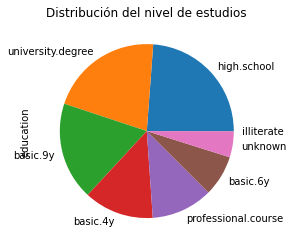

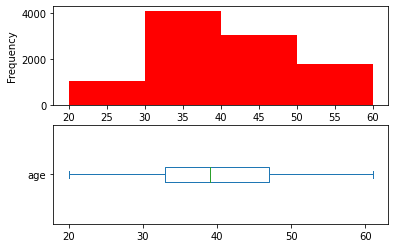

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame a partir de la url del fichero csv
df = pd.read_csv("https://aprendeconalf.es/docencia/python/examenes/inteligencia-negocios/soluciones/examen-2022-06-24/bank-loans.csv")
# Mostrar el índice de las columnas
print(df.columns)
# Mostrar las filas múltiplo de 10
print(df.iloc[range(0, len(df), 10)])
# Mostrar el número de clientes casados entre 30 y 40 años
print(len(df[(df.marital == "married") & (df.age > 30) & (df.age < 40)]))
# Añadir una columna con la edad en meses.
df["months"] = df.age * 12
print(df)
# Frecuencias de oficios ordenados de mayor a menor
print(df.job.value_counts().sort_values(ascending = False))
# Calcular la edad media según el nivel de estudios
print(df.groupby("education").age.mean())
# Calcular el porcentaje de prestamos hipotecarios según el estado civil
print(df.groupby("marital").housing.value_counts(normalize = True) * 100)
# Diagrama de sectores de nivel de estudios
fig, ax = plt.subplots()
df.education.value_counts(normalize = True).plot(kind = "pie", title = "Distribución del nivel de estudios")
plt.show()
# Histograma y diagrama de cajas de edades
fig, ax = plt.subplots(2)
df.age.plot(kind = "hist", ax = ax[0], bins = range(20, 70,10), color = "red")
df.age.plot(kind = "box", ax = ax[1], vert = False)
plt.show()
